In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sbi_life_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [6]:
#checking for the null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [8]:
#Checking for mean counts of the columns grouping by sex
df[['sex','smoker']].groupby(['sex'],as_index=False).mean()

,sex,smoker
0,0,0.173716
1,1,0.235207


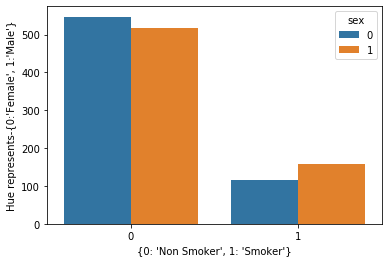

In [9]:
#Visualizing the countd of smoker and non smoker group by sex
sns.countplot(x='smoker',hue='sex',data=df)
plt.xlabel({0:'Non Smoker', 1:'Smoker'})
plt.ylabel("Hue represents-{0:'Female', 1:'Male'}")
plt.show()

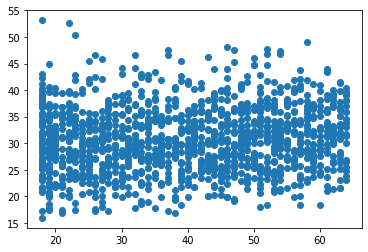

In [10]:
plt.scatter(x='age',y='bmi',data=df)

In [11]:
df[['sex','bmi']].groupby(['sex'],as_index=False).mean()

,sex,bmi
0,0,30.377749
1,1,30.943129


In [12]:
df[['age','bmi']].groupby(['age'],as_index=False).mean()

,age,bmi
0,18,31.326159
1,19,28.596912
2,20,30.632759
3,21,28.185714
4,22,31.087679
5,23,31.454464
6,24,29.142679
7,25,29.693929
8,26,29.428929
9,27,29.333571


In [13]:
#correlation betwwen age and bmi
df[['age','bmi']].corr()

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


In [14]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [15]:
#finding the correlation
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


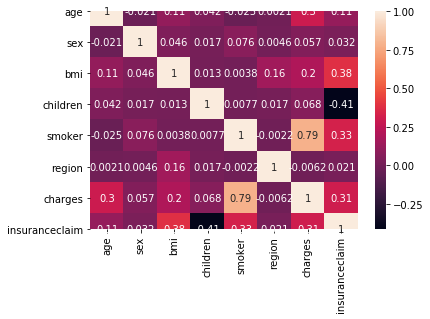

In [16]:
hmap=df.corr()
sns.heatmap(hmap,annot=True)

In [17]:
df[['insuranceclaim','bmi']].groupby(['insuranceclaim'],as_index=False).mean()

,insuranceclaim,bmi
0,0,27.881586
1,1,32.635179


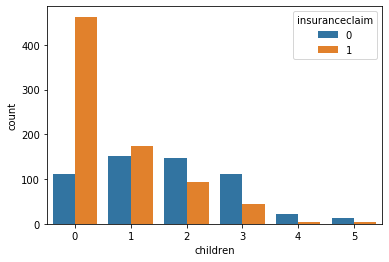

In [18]:
sns.countplot(x='children',hue='insuranceclaim',data=df)

In [19]:
df[['insuranceclaim','children']].corr()

,insuranceclaim,children
insuranceclaim,1.000000,-0.409526
children,-0.409526,1.000000


In [20]:
df[['insuranceclaim','bmi']].corr()

,insuranceclaim,bmi
insuranceclaim,1.000000,0.384198
bmi,0.384198,1.000000


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

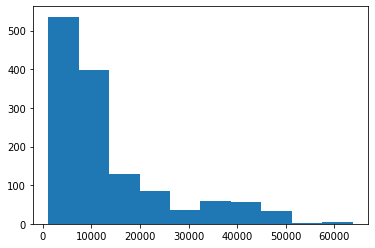

In [21]:
plt.hist(x='charges',data=df)

In [22]:
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [23]:
#removing the skewness
from scipy.stats import boxcox
df['charges']=boxcox(df['charges'],0)
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,9.734176,1
1,18,1,33.770,1,0,2,7.453302,1
2,28,1,33.000,3,0,2,8.400538,0
3,33,1,22.705,0,0,1,9.998092,0
4,32,1,28.880,0,0,1,8.260197,1


In [24]:
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges          -0.090098
insuranceclaim   -0.346254
dtype: float64

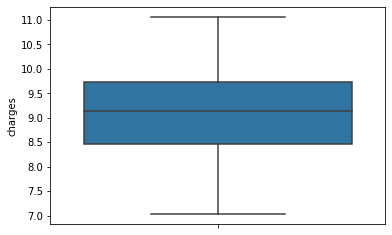

In [25]:
sns.boxplot(x='charges',data=df,orient='v')

In [26]:
#calculating te zscore
z=np.abs(zscore(df))

In [27]:
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.69139378,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 1.79001952,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.75950049,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 1.85210648,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 1.62512899,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.2851135 ,
        0.84190989]])

In [28]:
df1=df[(z>3).all(axis=1)]

In [29]:
df1

,age,sex,bmi,children,smoker,region,charges,insuranceclaim


In [30]:
#removing the outliers
df=df[(z<3).all(axis=1)]

In [31]:
df.shape

(1316, 8)

In [32]:
df['charges']=df['charges'].values

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,9.734176,1
1,18,1,33.770,1,0,2,7.453302,1
2,28,1,33.000,3,0,2,8.400538,0
3,33,1,22.705,0,0,1,9.998092,0
4,32,1,28.880,0,0,1,8.260197,1


In [34]:
y=df.iloc[:,7:8]
y

,insuranceclaim
0,1
1,1
2,0
3,0
4,1
...,...
1333,0
1334,1
1335,1
1336,0


In [35]:
x=df.iloc[:,:7]
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,9.268661
1334,18,0,31.920,0,0,0,7.698927
1335,18,0,36.850,0,0,2,7.396233
1336,21,0,25.800,0,0,3,7.604867


In [36]:
#drooping column region as it is not having the low correlation and will not impact the data 
x=x.drop(columns=['region'],axis=1)
x

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,9.734176
1,18,1,33.770,1,0,7.453302
2,28,1,33.000,3,0,8.400538
3,33,1,22.705,0,0,9.998092
4,32,1,28.880,0,0,8.260197
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,9.268661
1334,18,0,31.920,0,0,7.698927
1335,18,0,36.850,0,0,7.396233
1336,21,0,25.800,0,0,7.604867


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(921, 6)
(395, 6)
(921, 1)
(395, 1)


In [38]:
#applying StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
#Since we need classification,Hence using Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)


print("Predictions=",pred)
lr.score(x_train,y_train)

Predictions= [0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0]


0.8903365906623235

In [40]:
print(accuracy_score(y_test, pred))

0.8582278481012658


In [41]:
score=cross_val_score(lr,x,y,cv=5)
print('Score:',score)

Score: [0.87121212 0.878327   0.88212928 0.88973384 0.85931559]


In [42]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[127  32]
 [ 24 212]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       159
           1       0.87      0.90      0.88       236

    accuracy                           0.86       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.86      0.86      0.86       395



In [43]:
from sklearn.externals import joblib
joblib.dump(lr,'sbi_insurance_classification.pkl')

['sbi_insurance_classification.pkl']